<a href="https://colab.research.google.com/github/kurtlee1984/Deep_Leaning/blob/main/Pytorch_neural_network_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the toolkit**

In [1]:
# import toolkit
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
print(torch.__version__)

1.9.0+cu111


# **Perpar the data**

In [3]:
inputs = torch.tensor([[3.1], [4.4], [5.5], [6.1], [6.9], [4.1], [9.7], [6.1], [7.9], [2.7], [7.2], [9.1], [5.3], [7.9], [5.6], [9.2]], dtype = torch.float32)
targets = torch.tensor([[1.7], [2.1], [2.0], [1.9], [2.6], [1.3], [3.3], [2.6], [2.3], [1.1], [2.7], [3.5], [1.6], [2.9], [2.4], [2.9]], dtype = torch.float32)

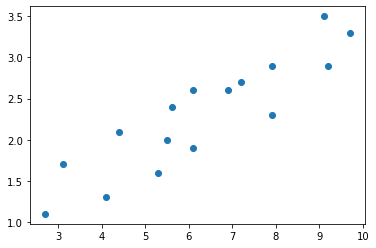

In [4]:
plt.scatter(inputs, targets)

# **Define the model**
Class torch.nn.Lnear(input_feature, out_feature, bias)
* input_feature : 輸入資料的維度大小
* out_feature : 輸出資料的維度大小
* bias : 預設為 True, 若設為 False, 將不學習 bais

In [5]:
model = nn.Linear(1, 1)
# 會預先給予一個初始值
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.8017]], requires_grad=True)
Parameter containing:
tensor([0.2447], requires_grad=True)


# **Define the Optimizer**

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# **Define the Loss Function**

In [7]:
critertion = nn.MSELoss()

# **Training Model**

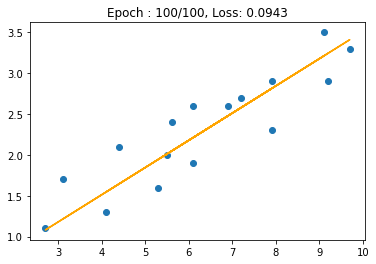

In [15]:
num_epochs = 100
fig = plt.figure()
loss_history = []

for epoch in range(num_epochs):
  outputs = model(inputs)
  loss = critertion(outputs, targets)

  # record vary of loss
  # item() : recall python float
  loss_history.append(loss.item())

  # optimizer to zero ; Gradient to zero
  optimizer.zero_grad()

  # Backward Propagation
  loss.backward()

  # Gradient Descent
  optimizer.step()

  if (epoch + 1) % 5 == 0:
    # model() : output predict (forward Propagation)
    # dtach() : recall tensor of "requires_grad = False"
    preds = model(inputs).detach()

    # drawing
    plt.scatter(inputs, targets)
    plt.plot(inputs, preds, "orange")
    plt.title("Epoch : {}/{}, Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

    clear_output(wait = True)
    plt.pause(0.5)

# **Loss of change graph**

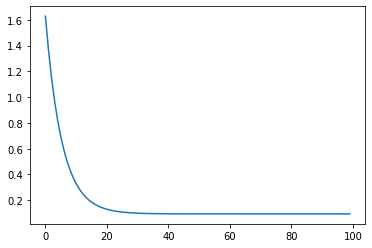

In [16]:
plt.plot(loss_history)